<a href="https://colab.research.google.com/github/Jacofeldman/Metodos1_JacoboFeldman/blob/Complementaria/complementaria_09.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

> Complementaria métodos computacionales 1
>
> Semana 09

***


**Nota: penalización de -1pt si se usa while en cualquier punto del código.**

Puede usar cualquier librería que esté publicada. Si usa algo aparte de numpy, referéncielo en un comentario.

# Descenso gradiente

Recordatorio: en Python se puede definir una función de un número no especificado de argumentos usando `f(arg1,arg2,*other_args)`. Por ejemplo:

```python
def cubic(x,*coef):
    A,B,C,D = coef
    return A*x**3 + B*x**2 + C*x + D
```

## 1) Gradiente de una función (2pt)

Dada una función con un número indeterminado de argumentos $f(x_1,x_2,x_3,...)$, escriba una función llamada "gradient" con la siguiente signatura: `gradient(f,x,h=1e-5)` que retorne el vector:

$$
\nabla_x f = \left\{ \frac{\partial f}{\partial x_1},\, \frac{\partial f}{\partial x_2},\, \frac{\partial f}{\partial x_3},\, ... \right\}
$$

Donde debe realizar la derivada numérica con diferencias finitas centrales, con paso de tamaño $h$. Las derivadas deben ir evaluadas en el otro parámetro, $x=\{x_1,x_2,x_3,...\}$.

* **+1pt** por la función gradient
* **+1pt** si no usa loops (for, while, map, ni recursión)

In [ ]:
import numpy as np

def cubic(x,*coef):
    A,B,C,D = coef
    return A*x**3 + B*x**2 + C*x + D

def gradient(f, x, h=1e-5):
    x = np.array(x, dtype=float)
    perturb = np.eye(len(x)) * h

    return (np.apply_along_axis(f, 1, x + perturb) - np.apply_along_axis(f, 1, x - perturb)) / (2 * h)


coef = [2, 3, 4, 5]

x = [0.1]
f = lambda x: cubic(x[0], *coef)
grad = gradient(f, x)

print(grad)



[4.66]


## 2) Optimización (4.5pt)

Queremos modelar un set de datos $\{x_i,y_i\}$ con una función que recibe $x$ y cierto número de parámetros `f(x,*[a,b,c,d,...])`. Para eso queremos minimizar la función de costo:

$$
\text{loss}(\alpha) = \sum_{i=1}^N \left(y_i - f(x_i,\ast\vec{\alpha})\right)^2
$$

Donde $\alpha=\{a,b,c,d,...\}$ es el vector de parámetros. Defina una función que reciba la función, los datos, y los parámetros iniciales:

```python
def gradient_descent_least_squares(f, x_data, y_data, alpha_0):
```

que implemente el descenso gradiente para encontrar el vector de parámetros $\alpha$  minimizar el loss; es decir, haga muchas iteraciones de

$$
\alpha_{\text{new}} = \alpha_{\text{old}} - \gamma \nabla_\alpha \text{loss}
$$

Hasta que el gradiente tenga una magnitud pequeña, quizás `1e-1`.

$\gamma$ es la llamada "learning rate", y debe ser pequeña. Puede entrar por parámetro; en ese caso incluya un valor por defecto de `1e-2`.

En bloque neón hay datos de prueba que fueron generados con la función $A e^{-x/B} \sin(C x) + D$

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving datos_ejemplo_ajuste.dat to datos_ejemplo_ajuste.dat


Parámetros optimizados: [4.28813961 0.6242718  7.57327759 0.56234448]


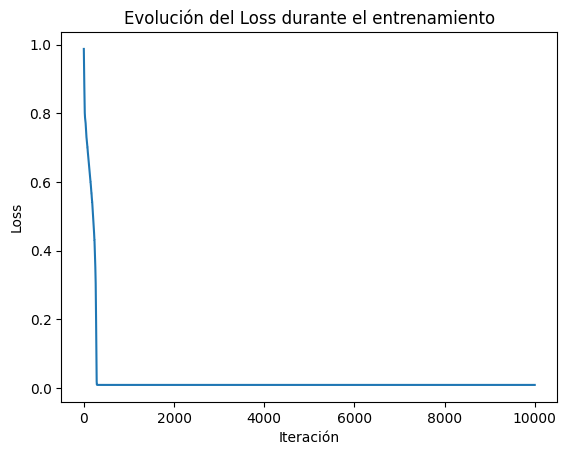

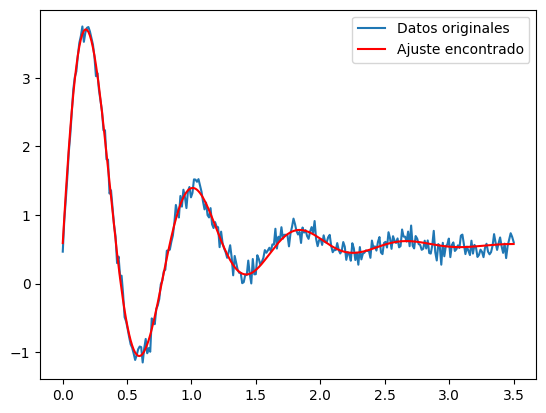

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def gradient_descent_least_squares(f, x_data, y_data, alpha_0, max_iters=10000, learning_rate=1e-2, tol=1e-7):
    alpha = np.array(alpha_0, dtype=float)  # Inicialización de los parámetros
    n = len(y_data)  # Número de datos
    loss_history = []

    def loss(alpha):
        # Función de pérdida, suma de errores al cuadrado
        return np.sum((y_data - f(x_data, *alpha))**2) / n

    def gradient(alpha):
        # Aproximación del gradiente con diferencias finitas
        grad = np.zeros_like(alpha)
        h = 1e-5  # Un pequeño cambio
        for i in range(len(alpha)):
            alpha_h = np.copy(alpha)
            alpha_h[i] += h
            grad[i] = (loss(alpha_h) - loss(alpha)) / h
        return grad

    for it in range(max_iters):
        grad = gradient(alpha)
        alpha_new = alpha - learning_rate * grad
        current_loss = loss(alpha)
        loss_history.append(current_loss)

        # Verifica convergencia
        if np.linalg.norm(grad) < tol:
            print(f"Convergencia alcanzada en iteración {it}")
            break

        # Verifica si el loss está disminuyendo
        if loss(alpha_new) > current_loss:
            print(f"Warning: el loss aumenta en la iteración {it}")
            learning_rate *= 0.5  # Disminuye el learning rate
        else:
            alpha = alpha_new
            learning_rate *= 1.1  # Incrementa el learning rate

        if it == max_iters - 1:
            print("Warning: Número máximo de iteraciones alcanzado")

    return alpha, loss_history

# Función f ejemplo (puedes cambiarla por la función específica de tu problema)
def f(x, A, B, C, D):
    return A * np.exp(-x/B) * np.sin(C*x) + D

# Datos de prueba
read=np.loadtxt('datos_ejemplo_ajuste.dat')
x_data=np.array(read[:,0])
y_data=np.array(read[:,1])

# Inicialización de parámetros
alpha_0 = [1, 1, 1, 1]  # Valores iniciales de A, B, C, D

# Ejecuta el descenso de gradiente
alpha_opt, loss_history = gradient_descent_least_squares(f, x_data, y_data, alpha_0)

print(f"Parámetros optimizados: {alpha_opt}")
plt.plot(loss_history)
plt.xlabel('Iteración')
plt.ylabel('Loss')
plt.title('Evolución del Loss durante el entrenamiento')
plt.show()

plt.plot(x_data, y_data, label='Datos originales')
plt.plot(x_data, f(x_data, *alpha_opt), label='Ajuste encontrado', color='red')
plt.legend()
plt.show()

### Distribución de puntos en este ejercicio:

Los puntos obligatorios son estos dos primeros:

* **0.5pt:** incluya una opción `max_iters=10_000`, y si el algoritmo realiza ese número de iteraciones pero aún no converge, que genere un _warning_ (no un error) y que retorne el último valor de `alpha` encontrado.

* **0.5pt:** que el algoritmo pueda encontrar la frecuencia de unos datos de la función coseno.

Los siguientes son opcionales.

* **1.0pt:** En su iteración, no acpete el nuevo alpha si el loss aumenta.
    * Si esto llega a ocurrir, disminuya la learning rate multiplicando por un cierto factor, y vuelva a repetir la iteración.
    * Si por el contrario el loss sí disminuye con el nuevo alpha, _aumente_ el learning rate dividiendo por el mismo factor, y continúe.
    * Dé un nombre adecuado a este factor, y póngalo como parámetro de su función.

* **0.5pt** lo mismo que el punto anterior, pero deje disminuir o aumentar el gradiente por un cierto número de iteraciones antes de cambiar el lerning rate. Ponga ese número de iteraciones como parámetro de su función, y dele un nombre adecuado.

* **0.5pt** haga que el código esté vectorizado, pero solamente en los parámetros iniciales. Es decir, si le paso a la función varios valores de alpha (quizá en forma de matriz), la función debe correr para cada uno de ellos y retornar los parámetros encontrados desde cada caso. No recomiendo usar `np.vectorize` esta vez.

* **0.5pt** agregue un parámetro a la función `train_test_divide=False`, que cuando sea un número diferente de cero, realice cada paso del descenso gradiente con una selección aleatoria de los datos `x` y `y`. Por ejemplo, si `train_test_divide=0.35`, cada paso se debe realizar seleccionando al azar el 35% de las parejas (x,y).

* **0.5pt** haga que su función vaya reportando el progreso. Esto debería incliur el valor del loss, el número de iteraciones, y otra información que usted considere.
    * **+0.5pt** si es por medio de una gráfica de loss.
    * **-1.0pt** si no borra el progreso anterior, es decir, si imprime 10mil líneas en el output o si hace 10mil gráficas.

## 3) Aplicación (?pt)

Encuentre una función que describa los datos que están en bloque neón `datos_09.npz`. Invéntesela, sea creativo, y ajuste los parámetros. ¿qué tan bien considera que están sus resultados? ¿cómo evaluaría numéricamente qué tan bien están?

Si usa un polinomio, una serie de Fourier, u otro modelo como una red neuronal que tenga un número variable de parámetros, encuentre el orden "óptimo". Investigue qué significa eso.

/usr/local/lib/python3.10/dist-packages/numpy/lib/polynomial.py:667: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
<ipython-input-44-6a28945bbe43>:11: RankWarning: Polyfit may be poorly conditioned
  coeficientes = np.polyfit(df_x, df_y, grado)


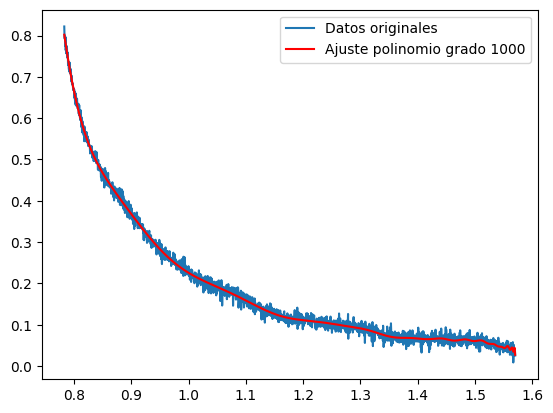

            785              784              783              782
3.986e-147 x   + 4.749e-147 x   + 5.367e-147 x   + 5.557e-147 x  
              781              780              779              778
 + 4.81e-147 x   + 2.259e-147 x   - 3.526e-147 x   - 1.488e-146 x  
               777              776              775              774
 - 3.548e-146 x   - 7.112e-146 x   - 1.307e-145 x   - 2.277e-145 x  
               773             772              771             770
 - 3.824e-145 x   - 6.25e-145 x   - 9.996e-145 x   - 1.57e-144 x  
               769              768              767              766
 - 2.426e-144 x   - 3.695e-144 x   - 5.549e-144 x   - 8.218e-144 x  
             765              764             763              762
 - 1.2e-143 x   - 1.726e-143 x   - 2.44e-143 x   - 3.382e-143 x  
               761          760              759              758
 - 4.576e-143 x   - 6e-143 x   - 7.539e-143 x   - 8.867e-143 x  
               757              756              755 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Cargar los datos
df = np.load('datos_09.npy')
df_x = df[:,0]
df_y = df[:,1]


grado = 1000
coeficientes = np.polyfit(df_x, df_y, grado)


polinomio = np.poly1d(coeficientes)


df_y_fit = polinomio(df_x)


plt.plot(df_x, df_y, label='Datos originales')
plt.plot(df_x, df_y_fit, label=f'Ajuste polinomio grado {grado}', color='red')
plt.legend()
plt.show()
print(f'Coeficientes del polinomio de grado {grado}:')
print(coeficientes)

